# **Multilevel Monte Carlo Method**

## **Setting**

**Given:**
* SDE (for the price of an underlying)
$$ dS(t) = f(t,S(t))dt + g(t,S(t))dW_t \qquad t \in [0,T] $$
$$ S(0) = S_0$$

* Function 
$$ \psi : \mathbb{R} \rightarrow \mathbb{R}$$

**Quantity of Interest:**
$$ \mathbb{E}[\underbrace{\psi(S(T))}_{:=P}] $$

## **Generation of Payoff function via true S(t)**

Which steps do we need to calculate the payoff function?
1. Generate a Wiener process $W_t \qquad \Rightarrow$  Function **wienerprocess**
2. Determine the path $S(t) \qquad \Rightarrow$  Function **S**
3. Calculate the terminal value $S(T) \qquad \Rightarrow$ Last Value of **S(t)**
4. Calculate the payoff value $\psi(S(T)) \qquad \Rightarrow$ Plug in into payoff functin **payoff**

In [8]:
import numpy as np 
from matplotlib import pyplot as plt 
from scipy.stats import norm
import time

In [9]:
# Parameter for Call Option
S_0 = 55
K = 50
r = 0.05
sigma = 0.1
T = 1

### 1. Wiener Path Summary

The **Wiener path**, also known as the Brownian motion path, is a mathematical concept used in stochastic calculus to model the random and continuous movement of particles. It is named after mathematician Norbert Wiener.

The path is characterized by its **randomness and unpredictability**, making it a key tool in understanding phenomena such as stock price movements and diffusion processes. The Wiener path is often employed in the development of stochastic differential equations.

In mathematical terms, a Wiener path is a function $W(t)$ defined for $t \geq 0$, with the following properties:

- $W(0 = 0)$ (starting point is at the origin)
- The increments $W(t_2) - W(t_1)$ are normally distributed with mean zero and variance $t_2 - t_1$.

The representation of the Wiener path involves advanced concepts in probability theory and analysis, making it a fundamental element in the study of stochastic processes.


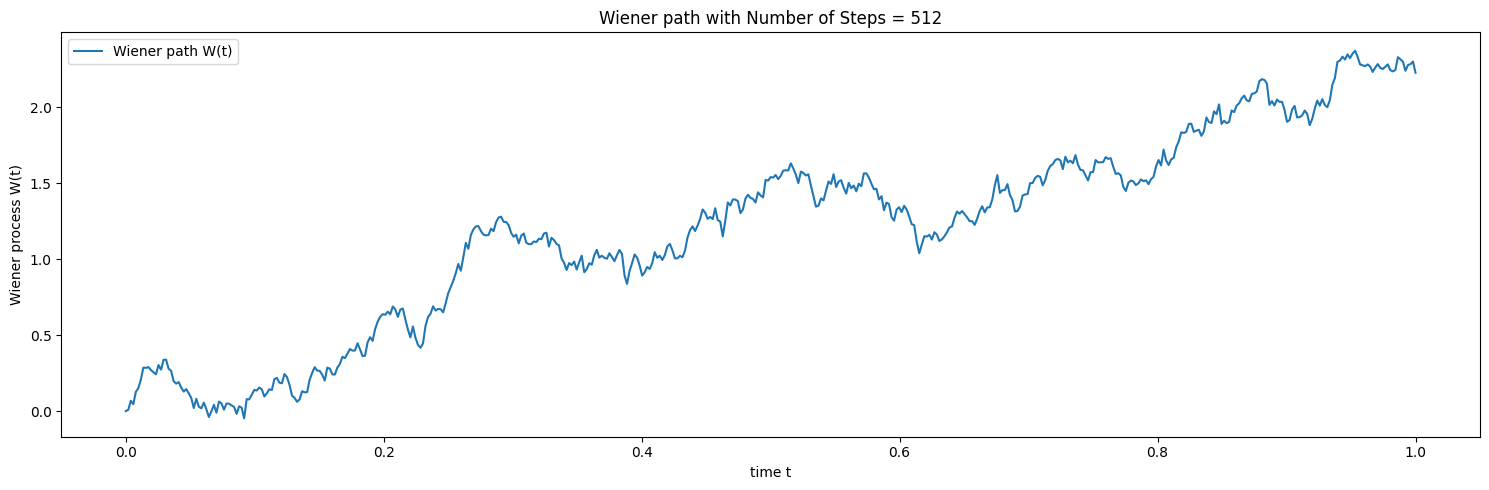

In [10]:
def wienerprocess(T,N,m):
    # Define the timesteps
    t = np.linspace(0,T,N+1)
    tau = T/N
    
    # Calculate for each m the Wiener process
    W = np.zeros((m,N+1), dtype=np.float64)
    for i in range(m):
        Z = np.random.normal(0,1,size=N) * np.sqrt(tau)
        W[i,1:] = np.cumsum(Z)
    return t, W


# Calculate the Wienerprocess W(T)
Number_steps = 2**9
Number_Paths = 1
tw, W = wienerprocess(T,Number_steps, Number_Paths)

# Visualize Wienerprocesses
plt.figure(figsize= (15,5), layout = 'tight')
for i in range(W.shape[0]):
    plt.plot(tw, W[i,:],label=f"Wiener path W(t)")
    
plt.title(f"Wiener path with Number of Steps = {Number_steps}")
plt.xlabel('time t')
plt.ylabel('Wiener process W(t)')
plt.legend()
plt.show()

### 2. & 3. Geometric Brownian Motion Summary

**Geometric Brownian Motion (GBM)** is a stochastic process commonly used to model the evolution of financial instruments, particularly stock prices. It is an extension of the Brownian motion that incorporates a drift and volatility component.

The dynamics of a Geometric Brownian Motion are described by the following stochastic differential equation:

$$
dS(t) = \mu S(t) dt + \sigma S(t) dW(t)
$$

where:
- $S(t)$ is the asset price at time $t$,
- $\mu$ is the drift rate (average rate of return per unit time),
- $\sigma$ is the volatility (standard deviation of the rate of return),
- $W(t)$ is a Wiener process.

The key features of Geometric Brownian Motion include exponential growth and the incorporation of random fluctuations due to the Wiener process. This makes GBM a fundamental tool in option pricing, risk management, and financial modeling.

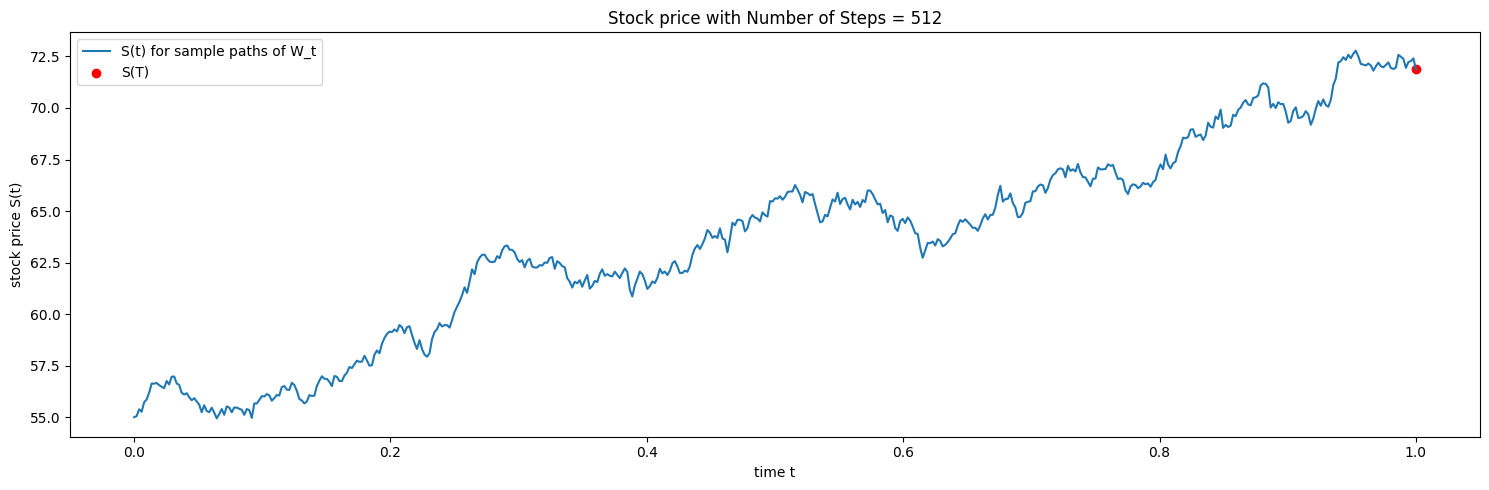

In [11]:
def S(t, mu, sigma, S0, W):
    a = mu - (sigma**2)/2
    return S0 * np.exp(( np.array(t) * a + sigma * W))


# Visualize the paths S(t)
plt.figure(figsize= (15,5), layout = 'tight')
for i in range(W.shape[0]):
    plt.plot(tw, S(tw,r,sigma,S_0, W[i,:]), label=f"S(t) for sample paths of W_t")
    plt.scatter(tw[-1],S(tw,r,sigma,S_0, W[i,:])[-1],color='red',label=f"S(T)")
plt.title(f"Stock price with Number of Steps = {Number_steps}")
plt.xlabel('time t')
plt.ylabel('stock price S(t)')
plt.legend()
plt.show()


### 4. European Call Option Payoff Function Summary

The **payoff function** for a European Call option represents the profit or loss that an option holder would incur at the expiration date. The European Call option gives the holder the right (but not the obligation) to buy an underlying asset at a predetermined strike price $K$.

The payoff $P$ for a European Call option at expiration is given by the following formula:

$$
P = \max(S_T - K, 0)
$$

where:
- $S_T$ is the price of the underlying asset at expiration.

The formula indicates that if the price of the underlying asset $S_T$ is greater than the strike price $K$, the option holder will exercise the option, resulting in a positive payoff equal to the difference between the asset price and the strike price. If $S_T$ is less than $K$, the option expires worthless, and the payoff is zero.

The European Call option payoff function is widely used in options pricing models and financial derivatives strategies.


Text(0.5, 1.0, 'Payoff function of European Call option')

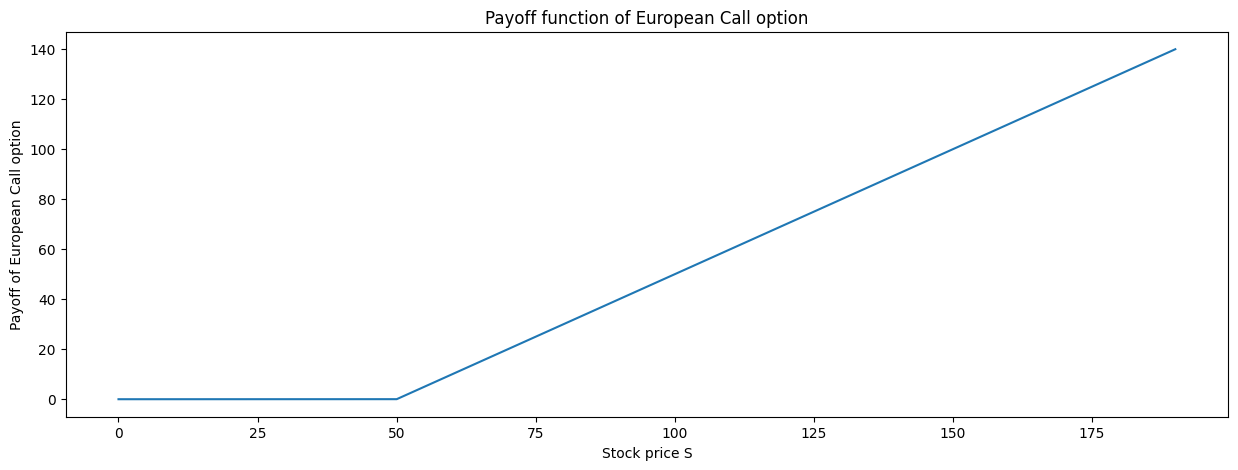

In [12]:
def payoff(x):
   return np.where(x-K < 0,0,x-K)

x = np.linspace(0,190, 1000)
plt.figure(figsize=(15,5))
plt.plot(x,payoff(x))
plt.xlabel("Stock price S")
plt.ylabel("Payoff of European Call option")
plt.title("Payoff function of European Call option")

## **Approximate paths S(t) using a numerical method**

# Approximating SDE with Euler-Maruyama Method

When tackling the numerical solution of stochastic differential equations (SDEs), the Euler-Maruyama method stands out as a widely employed technique, particularly in computational finance and scientific simulations. This method proves valuable for approximating continuous-time SDEs involving random processes like Brownian motion. The Euler-Maruyama method discretizes the SDE into smaller time steps, enabling a stepwise approximation of the stochastic process. At each time step, the solution is updated based on the drift and diffusion components, providing a computationally efficient approach for simulating complex financial models. Despite introducing discretization error, the method strikes a balance between simplicity and accuracy, making it a favored tool for researchers and practitioners across various fields.


$\hat{S}_T$ is an approximation of $S(T)$ obtained by a numerical methods (Euler Maruyama) with step size $\tau$. 


NameError: name 'l' is not defined

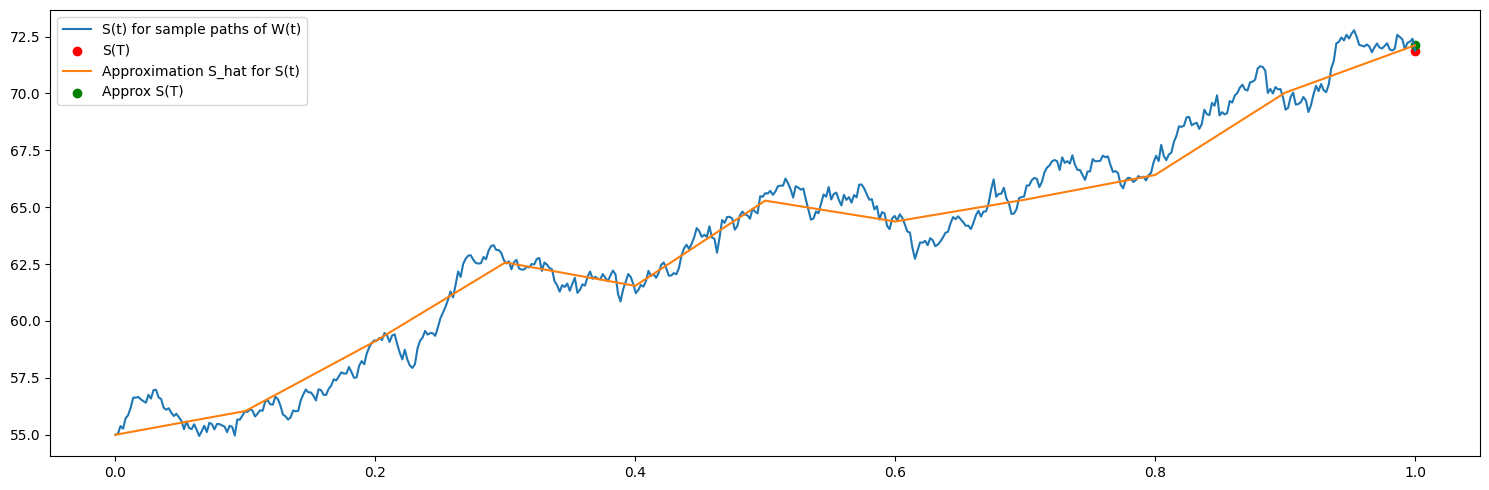

In [13]:
# Step size
tau = 1/10

# Approxiamtion SDE with Euler Maruyama
def eulerMaruyama(f, g, X0, T, W):
    m,N = W.shape
    N = N-1
    tau = T/N
    t = np.linspace(0,T,N+1)
    X = np.zeros((m,N+1))
    X[:,0] = X0
    increments = W[:,1:N+1] - W[:,0:N]
    
    for n in range(N):
        X[:,n+1] = X[:,n] + tau * f(X[:,n]) + g(X[:,n]) * increments[:,n]
    
    return t, X

# Function for SDE 
def mu_func(X):
    return r*X

def sigma_func(X):
    return sigma*X

k_l = Number_steps/(T/tau) # Use each k_l-th step for the Numerical method
tx_1 , S_l = eulerMaruyama(mu_func,sigma_func, X0= S_0, T= T, W= W[:, ::int(k_l)])

# Visualize the numerical approximation of S(t)
plt.figure(figsize= (15,5), layout = 'tight')
for i in range(W.shape[0]):
    plt.plot(tw, S(tw,r,sigma,S_0, W[i,:]), label=f"S(t) for sample paths of W(t)")
    plt.scatter(tw[-1],S(tw,r,sigma,S_0, W[i,:])[-1],color='red',label=f"S(T)")
    
    plt.plot(tx_1, S_l[i,:],label='Approximation S_hat for S(t)')
    plt.scatter(tx_1[-1],S_l[i,:][-1],color='green',label=f"Approx S(T)")
    plt.legend()
    
plt.title(f"Numerical Approximation of Stock price. Number of Steps Wiener process = {Number_steps}, Level = {l}")
plt.xlabel('time t')
plt.ylabel('stock price S(t)')
plt.show()

Furthermore when caluclating the **payoff** function we get

$$ \hat{P}_{\tau} = \psi(\hat{S}_T) \thickapprox P $$

We get that $ \mathbb{E}[\hat{P}_{\tau}] = \mathbb{E}[\psi(\hat{S}_T) ]$ determined by all **uncountable many** possible paths of the Wiener process.

The **weak error**  bound of the numerical method is given by:
$$ \biggl|\mathbb{E}[\hat{P}_\tau]-\mathbb{E}[\hat{P}] \biggl|$$

can be controlled by a sufficiently small choice of $\tau$

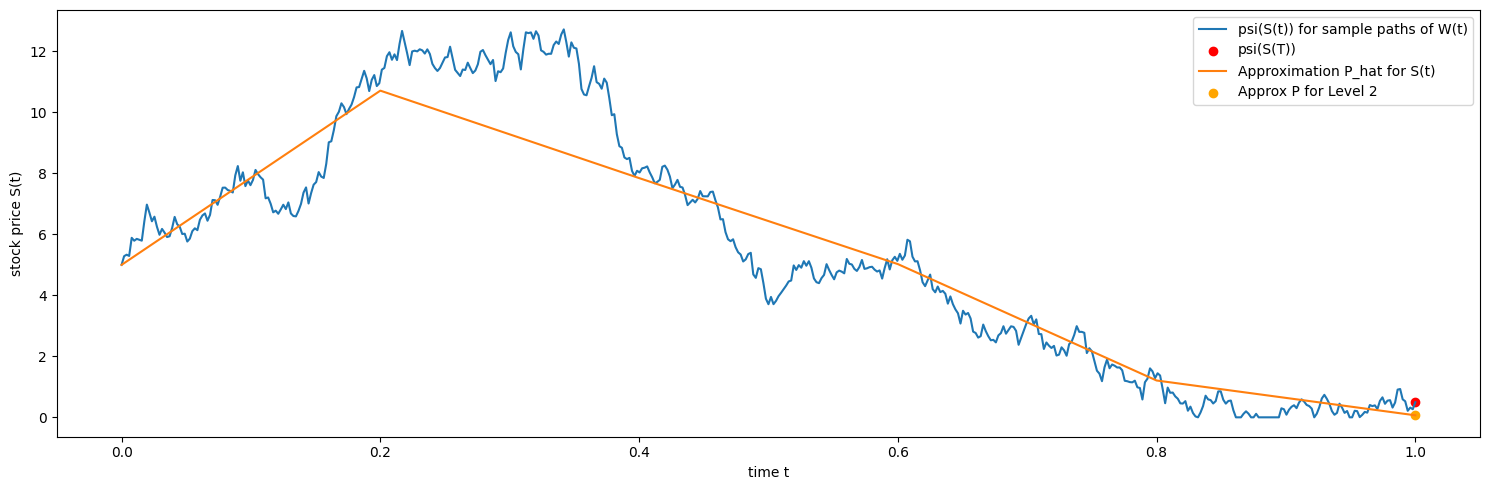

In [ ]:
plt.figure(figsize= (15,5), layout = 'tight')

plt.plot(tw, payoff(S(tw,r,sigma, S_0, W[0,:])), label=f"psi(S(t)) for sample paths of W(t)")
plt.scatter(tw[-1],payoff(S(tw,r,sigma,S_0, W[0,:]))[-1],color='red',label=f"psi(S(T))")

plt.plot(tx_1, payoff(S_l[0,:]),label='Approximation P_hat for S(t)')
plt.scatter(tx_1[-1],payoff(S_l[0,:])[-1],color='orange',label=f"Approx P for Level {l}")


plt.xlabel('time t')
plt.ylabel('stock price S(t)')
plt.legend()

# Numerical Estimation of Expected Payoff

In our approach, we have adopted a numerical method with a small step size $ \tau^* $ to ensure a sufficiently accurate approximation. Specifically, we aim to estimate the expected payoff 
$$ \mathbb{E}[P] = \mathbb{E}[\psi(S(T))] \thickapprox \mathbb{E}[\psi(\hat{S}(\tau))] =  $$
, where psi hat S in our numerical computation (e.g., choosing $ \tau^* = T/2187 $).

## ToDo: Estimating $ \mathbb{E}[\hat{P}_{\tau}] $

The challenge now is to estimate $ E[Pb\tau^*] $ using only a finite number of sample paths of the Wiener process $ W_t $. Two viable options are considered:

1. **Option 1: Monte Carlo Integration (Monte Carlo Simulation)**
   - This involves generating random paths of the Wiener process and computing the average payoff over these paths to estimate the expected value.

2. **Option 2: Multilevel Monte Carlo**
   - A sophisticated extension of Monte Carlo integration, the multilevel Monte Carlo method, aims to achieve more accurate estimations by utilizing information from paths with varying levels of refinement.

These numerical techniques play a crucial role in efficiently and accurately estimating the expected payoff in the context of stochastic processes.

## **Option 1: Monte Carlo**

- Choose finite number $m$ of sample paths $\omega_i, i = 1,\dots,m$ of $W_t$
- For each $\omega_i$ compute approximation $\hat{S}_{\tau}^{(i)} \thickapprox S(T,\omega_i)$ and set $\hat{P}_{\tau_i}^{(i)} = \psi(\hat{S}_{\tau_i}^{(i)})$
- Estimate $\mathbb{E}[\hat{P}_{\tau}] \thickapprox \frac{1}{m}\sum_{i=0}^{m}\hat{P}_{\tau}^(i)$

However, **Problem**:
$\mathbb{V}(\hat{P}_{\tau})$ is large. Thus the number of samples $m$ has to be huge such that the approximation error is small. For each $m$ a large number of time steps has to be computed. $\rightarrow$ Total work huge!


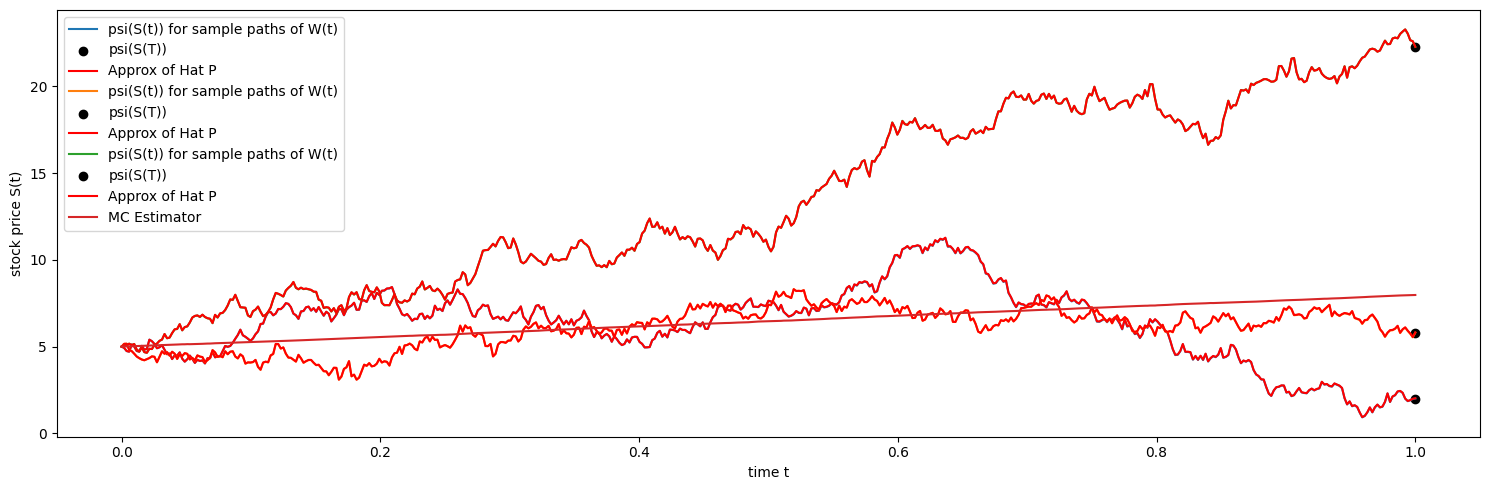

In [ ]:
m = 10**4
tw, W = wienerprocess(T, Number_steps, m)
tx, S_approx = eulerMaruyama(mu_func,sigma_func,S_0,T,W)
P_approx = payoff(S_approx)

def MC():
    return 1/m * np.sum(P_approx,axis=0)


plt.figure(figsize= (15,5), layout = 'tight')

for i in range(3):
    plt.plot(tw, payoff(S(tw,r,sigma, S_0, W[i,:])), label=f"psi(S(t)) for sample paths of W(t)")
    plt.scatter(tw[-1],payoff(S(tw,r,sigma,S_0, W[i,:]))[-1],color='black',label=f"psi(S(T))")
    
    plt.plot(tx, P_approx[i,:], label=f"Approx of Hat P", color='red')

plt.plot(tx, MC(), label=f"MC Estimator")

plt.xlabel('time t')
plt.ylabel('stock price S(t)')
plt.legend()

## **Option 2: Multilevel Monte Carlo**

- **Goal**: Estimate $\mathbb{E}[\hat{P}_L]
- **Trick**: Write
$$ \hat{P}_L = \hat{P}_0 + \sum_{l=1}^L(\hat{P}_l - \hat{P}_{l-1}) $$
for the expected value it follows
$$ \mathbb{E}[\hat{P}_L] = \mathbb{E}[\hat{P}_0] + \sum_{l=1}^L\mathbb{E}[\hat{P}_l - \hat{P}_{l-1}] $$

- Instead of directly estimating $\mathbb{E}[\hat{P}_L]$, estimat each addend using Monte Carlo Integration with different sample sets of different sizes:

$$ \mathbb{E}[\hat{P}_0] \thickapprox \frac{1}{m_0}\sum_{i=1}^{m_0}\hat{P}_0^{(0,i)} =: \hat{Y}_0 $$

 $$ \mathbb{E}[\hat{P}_l -    \hat{P}_{l-1}]  \thickapprox \frac{1}{m_l} \sum_{i=1}^{m_l}(\hat{P}_l^{(l,i)} - \hat{P}_{l-1}^(l,i)) =: \hat{Y}_l  \qquad l = 1, \dots, L $$

 $\rightarrow$ $\mathbb{E}[\hat{P}_L]$ is estimated using $L+1$ estimators.



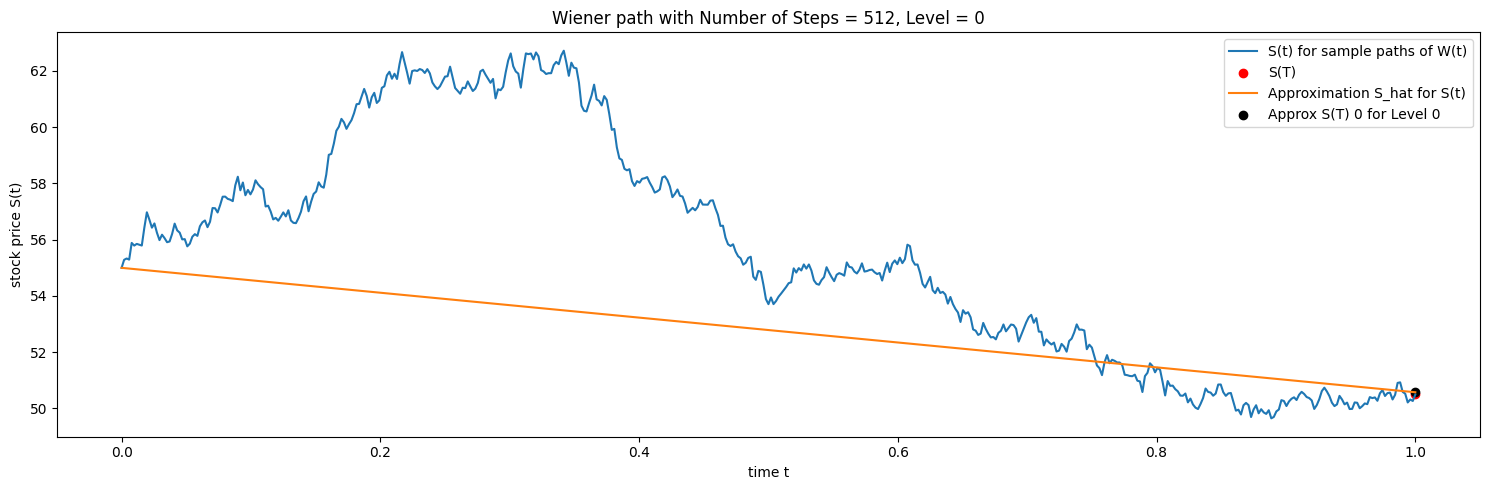

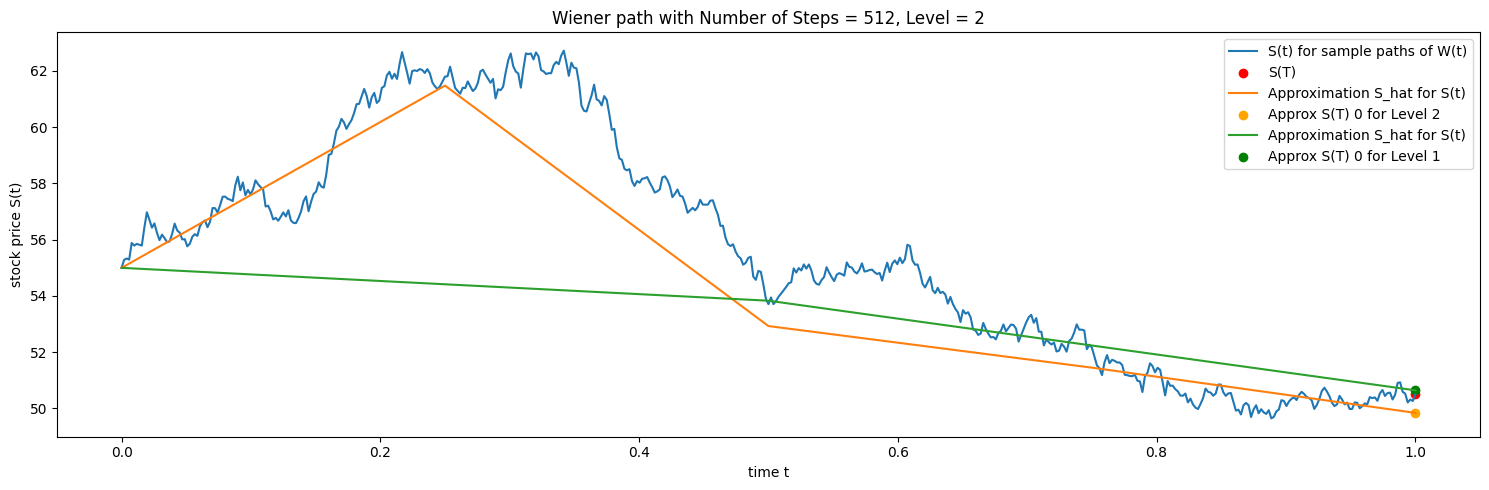

In [ ]:
# Level 0
tx_0 , S_l_0 = eulerMaruyama(mu_func,sigma_func, X0= S_0, T= T, W= W[:, ::int(Number_steps)])

# Visualize the numerical approximation of S(t) for Level 0
plt.figure(figsize= (15,5), layout = 'tight')

plt.plot(tw, S(tw,r,sigma,S_0, W[0,:]), label=f"S(t) for sample paths of W(t)")
plt.scatter(tw[-1],S(tw,r,sigma,S_0, W[0,:])[-1],color='red',label=f"S(T)")

plt.plot(tx_0, S_l_0[0,:],label='Approximation S_hat for S(t)')
plt.scatter(tx_0[-1],S_l_0[0,:][-1],color='black',label=f"Approx S(T) {i} for Level 0")

plt.title(f"Wiener path with Number of Steps = {Number_steps}, Level = 0")
plt.xlabel('time t')
plt.ylabel('stock price S(t)')
plt.legend()

# Arbitrary Level 
l = 2 # Level 
M = 2 

k_l = Number_steps/(M**l)
k_l_1 = Number_steps/(M**(l-1))

tx_1 , S_l = eulerMaruyama(mu_func,sigma_func, X0= S_0, T= T, W= W[:, ::int(k_l)])
tx_1_minus_1 , S_l_minus_1 = eulerMaruyama(mu_func,sigma_func, X0= S_0, T = T, W= W[:, ::int(k_l_1)])

# Visualize the numerical approximation of S(t) for two differente Levels
plt.figure(figsize= (15,5), layout = 'tight')

plt.plot(tw, S(tw,r,sigma,S_0, W[0,:]), label=f"S(t) for sample paths of W(t)")
plt.scatter(tw[-1],S(tw,r,sigma,S_0, W[0,:])[-1],color='red',label=f"S(T)")


plt.plot(tx_1, S_l[0,:],label='Approximation S_hat for S(t)')
plt.scatter(tx_1[-1],S_l[0,:][-1],color='orange',label=f"Approx S(T) {i} for Level {l}")

plt.plot(tx_1_minus_1, S_l_minus_1[0,:],label='Approximation S_hat for S(t)')
plt.scatter(tx_1_minus_1[-1],S_l_minus_1[0,:][-1],color='green',label=f"Approx S(T) {i} for Level {l-1}")

plt.title(f"Wiener path with Number of Steps = {Number_steps}, Level = {l}")
plt.xlabel('time t')
plt.ylabel('stock price S(t)')
plt.legend()

The function **MLMC_european_l** is specific for the considered European option. For given **level** l, **factor** M, number of **samples** ml, and option parameter pars, this function simulates paths of the stock price using the Euler-Maruyama method (with step sizes tau_l and tau_l-1) and determines the corresponding payoffs P_l and P_l-1 and computes sums.


In [17]:

def MLMC_european_l(l, M, ml, S_0,T):
    # Calculate ml Wienerprocesses with N timesteps
    k_l = Number_steps/(M**l)
    k_l_1 = Number_steps/(M**(l-1))
      
    
    tw, W = wienerprocess(T,Number_steps,ml)
    
    # Calculate with Euler Maruyama two payoffs
    if l == 0:
        tx_1 , S_l = eulerMaruyama(mu_func,sigma_func, X0= S_0, T= T, W= W[:, ::int(k_l)]) 
        P_l = payoff(S_l[:,-1])
        estSum = np.sum(P_l)
        estSumsq = np.sum((P_l)**2)
        return estSum, estSumsq

    else:
        tx_1 , S_l = eulerMaruyama(mu_func,sigma_func, X0= S_0, T= T, W= W[:, ::int(k_l)])
        tx_1_minus_1 , S_l_minus_1 = eulerMaruyama(mu_func,sigma_func, X0= S_0, T = T, W= W[:, ::int(k_l_1)])
        
        P_l = payoff(S_l[:,-1])
        P_l_minus_1 = payoff(S_l_minus_1[:,-1])
                
        estSum = np.sum(P_l - P_l_minus_1)
        estSumsq = np.sum((P_l - P_l_minus_1)**2)
        
        return estSum, estSumsq

The function **MLMC** performs all the steps of the multilevel Monte Carlo method. For given factor M and a desired mean-square error e^2, it computes an approximation V to the option value. 

In [14]:
def MLMC(M, error):
    terminal_condition = False
    L = 0
    mL = 10**4
    
    ml_vec = np.array([])
    estSum_vec = np.array([])
    estSumq_vec = np.array([])
    Variance_vec = np.array([])

    while not terminal_condition:
        print('--------------------------------------------------\n')
        ml_vec = np.append(ml_vec, mL)
        estSum, estSumq = MLMC_european_l(l=L, M= M, ml= int(mL), S_0= S_0, T = T)

        estSum_vec = np.append(estSum_vec, estSum)
        estSumq_vec = np.append(estSumq_vec, estSumq)

        Variance_vec = np.append(Variance_vec, estSumq/mL - (estSum/mL)**2)
        
        print(f"Level {L}: The Variance is {Variance_vec[-1]} and the Number of samples are {ml_vec[-1]}. The estimator for this Level is {estSum/mL}")

        tau = (T/(M**np.arange(0,L+1)))
        ml_optimal = np.ceil(2/(error**2) * np.sqrt(Variance_vec*tau) * np.sum(np.sqrt(Variance_vec / tau)))
        
        for l in range(L):
            ml_dif = ml_optimal[l] - ml_vec[l]
            if ml_dif > 0:
                estSum, estSumq = MLMC_european_l(l = l, M = M, ml= int(ml_dif), S_0 = S_0, T = T)
                ml_vec[l] = ml_vec[l] + ml_dif
                estSum_vec[l] = estSum_vec[l] + estSum
                estSumq_vec[l] = estSumq_vec[l] + estSumq
                print(f"Level {l}: Add {ml_dif} new samples, now {ml_optimal[l]} samples in total")
                
        
        Variance_vec = estSumq_vec/ml_vec - (estSum_vec/ml_vec)**2

        if L > 1:
            condition = np.max(np.array([
                np.abs(estSum_vec[-1] / ml_vec[-1]),
                np.abs(estSum_vec[-2] / (ml_vec[-2] * M)),
                np.abs(estSum_vec[-3] / (ml_vec[-3] * (M**2)))])
            )
            if (condition <= ((M - 1) * np.sqrt(error**2)) / np.sqrt(2)):
                terminal_condition = True
                break

        L = L + 1
    Y = np.sum(estSum_vec/ml_vec)

    return Y, ml_vec


The Multilevel Monte Carlo (MLMC) is calculated and finally the discount function applied.

In [19]:
M = 2
error = 10**(-2)

Y, ml_vec = MLMC(M,error)
print(Y * np.exp(-r))


--------------------------------------------------

Level 0: The Variance is 26.636382973688868 and the Number of samples are 10000.0. The estimator for this Level is 7.873496020136379
--------------------------------------------------

Level 1: The Variance is 0.087124196479562 and the Number of samples are 10000.0. The estimator for this Level is 0.029417882641588358
Level 0: Add 565816.0 new samples, now 575816.0 samples in total
--------------------------------------------------

Level 2: The Variance is 0.04125937636940667 and the Number of samples are 10000.0. The estimator for this Level is 0.011844875320297798
Level 0: Add 35719.0 new samples, now 611535.0 samples in total
Level 1: Add 14866.0 new samples, now 24866.0 samples in total
--------------------------------------------------

Level 3: The Variance is 0.020096410487631666 and the Number of samples are 10000.0. The estimator for this Level is 0.00681304415164839
Level 0: Add 41378.0 new samples, now 652913.0 samples in 

Furthermore we can calculate the "true" value of the European Call Option with given parameter. The **Black and Scholes formulas** are given by:

In [20]:
d1 = (np.log(S_0/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
d2 = (np.log(S_0/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))

Price_Analytical = S_0*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
print(Price_Analytical)

7.605041650687042


--------------------------------------------------

Level 0: The Variance is 25.95506874434289 and the Number of samples are 10000.0. The estimator for this Level is 7.942647907526689
--------------------------------------------------

Level 1: The Variance is 0.08688820559817063 and the Number of samples are 10000.0. The estimator for this Level is 0.026340392766673784
--------------------------------------------------

Level 2: The Variance is 0.04083975691549136 and the Number of samples are 10000.0. The estimator for this Level is 0.01238712977412942
--------------------------------------------------

Level 3: The Variance is 0.020479714602240868 and the Number of samples are 10000.0. The estimator for this Level is 0.00601400783854981
--------------------------------------------------

Level 0: The Variance is 25.92938238840985 and the Number of samples are 10000.0. The estimator for this Level is 8.018966213537519
--------------------------------------------------

Level 1: The V

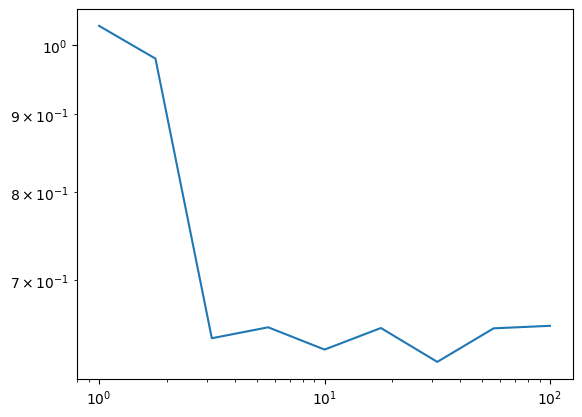

In [ ]:
Exponent = np.array([0,0.25,0.5,0.75,1,1.25,1.5,1.75,2])
execution_time = np.zeros(len(Exponent))
for i in range(len(Exponent)):
    start_time = time.time()
    Y, ml = MLMC(2,10**(Exponent[i]))
    end_time = time.time()
    execution_time[i] = end_time - start_time
    
print("execution time",execution_time)
    
plt.loglog(10**(Exponent), execution_time)
plt.show()
    
